In [1]:
from __future__ import division
from neuron import h
from neuron import gui

## Create model

In [4]:
# create model
soma = h.Section(name='soma')
soma.L    = 20 # the length of the soma, in microns
soma.diam = 20 # the diameter of the soma, in microns
soma.Ra   = 100 # tha axial resistance
soma.insert('pas') # add passive properties 
soma.g_pas = 5E-5 # specific membrane conductance:
soma.e_pas = -70

## Create Current Clamp and set the variables for the current injection

In [9]:
stim = h.IClamp(soma(0.5))
stim.delay = 20 # start of the current injection (ms)
stim.dur   = 100 # duration (ms)
stim.amp   = 0.01 # amplitude (nA)

# record voltage of soma and injected current and the time

In [10]:
soma_v = h.Vector()
soma_v.record(soma(0.5)._ref_v)

stim_current = h.Vector()
stim_current.record(stim._ref_i)

t = h.Vector()
t.record(h._ref_t)

Vector[7]

# set starting voltage, run time, and run the simulation

In [17]:
h.tstop = 220 # set the simulation time
h.v_init = -70
# run simulation
h.run()

0.0

# plot the injected current and the voltage response

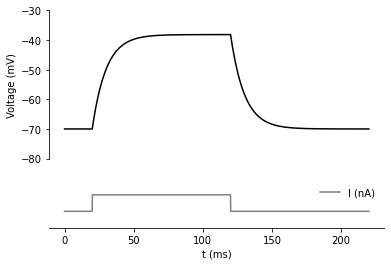

In [18]:
f, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax0.plot(t,soma_v, 'k')
ax1.plot(t,stim_current, 'gray', label='I (nA)')

ax0.set_ylabel('Voltage (mV)')
ax0.set_ylim(-80,-30)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.get_xaxis().set_visible(False)


ax1.set_ylabel('I (nA)')
ax1.set_xlabel('t (ms)')
ax1.set_ylim(-0.01,0.02)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.legend(frameon=False)